# Goal: Identify asteroids containing rare earth elements that have orbits intersecting near earth.

Goal 1: Aquire data from Asterank vis csv

Goal 2: Clean data

Goal 3: Identify asteroids that have an orbit approaching earth (0.8 AU to 1.2 AU: Au = astronimal units. Earth is 1 AU)

Goal 4: Determin quantity of rare earth metals on asteroids in terms of dollars. 

Goal 5: Investigate relation ships between asteroid orbits and there compisiton





# General Information from Asterank website
Asterank is a scientific and economic database of over 600,000 asteroids.  The database is a collection of data consisting of asteroid mass, spectral data, orbits, and  other critical data points. Asteroid mass and spectral data are employed to estimate a financial value based on current metal prices. (examples: Os, Ir, Ru, Pt, Rh, Co, Au, Pd, Ni, and Cr) . 

For the purpose of this exercise, the value of each asteroid will serve as a metric to quantify the presence of rare earth elements. An asteroid estimated to be valued at 1 trillion ($)  and above will be considered to have a significant precious metals and or rare earth metals. Remaining value categories have been assigned at, less than one billion(millions), Less than a trillion (billions), Over 1 trillion (trillions), and greater than 100 trillion.

Orbital data will be evaluated to determine the proximity of an asteroid to earth.  A range of  0.8 to 1.2 Astronomical Units  (AU) will be used for this exercise. 


4,000 rows of data was obtaind from Asterank webist

In [32]:
 # Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import os
import json
import scipy.stats as st

# Extract Data

In [33]:
asteroid_value_df = pd.read_csv("raw_asteroid_data.csv")

In [34]:
#asteroid_value_df.nunique()

In [35]:
asteroid_value_critical_df = asteroid_value_df.drop(["Type", "Est. Profit ($)","Δv (km/s)", "e"], axis = 1)
asteroid_value_df = asteroid_value_critical_df

# Clean Data

In [36]:
asteroid_value_df[['($)','unit_value($)']] = asteroid_value_df["Value ($)"].str.split(' ',expand=True)
asteroid_value_df

,name,Orbit (AU),Value ($),Group,($),unit_value($)
0,Ryugu,1.190,82.76 billion,APO (PHA),82.76,billion
1,1989 ML,1.272,13.94 billion,AMO,13.94,billion
2,Nereus,1.489,4.71 billion,APO (PHA),4.71,billion
3,Bennu,1.126,669.96 million,APO (PHA),669.96,million
4,Didymos,1.644,62.25 billion,APO (PHA),62.25,billion
...,...,...,...,...,...,...
3995,2018 ML2,1.910,0,IMB,0,None
3996,2018 MK2,3.049,0,MBA,0,None
3997,2018 MH2,2.954,0,MBA,0,None
3998,2018 MG2,3.148,0,MBA,0,None


In [37]:
# Replace NaN in ($) with zero for futrue grouping
asteroid_value_df["unit_value($)"].fillna("zero", inplace=True)
#asteroid_value_df["value_dollar"].fillna(0, inplace=True)

# Create final column Too Much for value greater than 100 trillion
asteroid_value_df.loc[asteroid_value_df["($)"] == ">100", ["unit_value($)"]] = "Too Much" 
 

asteroid_value_df

,name,Orbit (AU),Value ($),Group,($),unit_value($)
0,Ryugu,1.190,82.76 billion,APO (PHA),82.76,billion
1,1989 ML,1.272,13.94 billion,AMO,13.94,billion
2,Nereus,1.489,4.71 billion,APO (PHA),4.71,billion
3,Bennu,1.126,669.96 million,APO (PHA),669.96,million
4,Didymos,1.644,62.25 billion,APO (PHA),62.25,billion
...,...,...,...,...,...,...
3995,2018 ML2,1.910,0,IMB,0,zero
3996,2018 MK2,3.049,0,MBA,0,zero
3997,2018 MH2,2.954,0,MBA,0,zero
3998,2018 MG2,3.148,0,MBA,0,zero


In [38]:
# Have four classes need
total_asteroids_group = asteroid_value_df["unit_value($)"].value_counts()
total_asteroids_df = pd.DataFrame(total_asteroids_group)
total_asteroids_df.reset_index()

,index,unit_value($)
0,zero,3011
1,Too Much,700
2,billion,196
3,trillion,67
4,million,26


In [39]:
# Create a groups column
asteroid_value_df["Metal Content"] = ""
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "Too Much", ["Metal Content"]] = "A_High Metal Content" 
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "zero", ["Metal Content"]] = "E_No Metal identified" 
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "million", ["Metal Content"]] = "D_Very low Content" 
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "billion", ["Metal Content"]] = "C_Low Metal Content" 
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "trillion", ["Metal Content"]] = "B_Metal Content" 
asteroid_value_df

,name,Orbit (AU),Value ($),Group,($),unit_value($),Metal Content
0,Ryugu,1.190,82.76 billion,APO (PHA),82.76,billion,C_Low Metal Content
1,1989 ML,1.272,13.94 billion,AMO,13.94,billion,C_Low Metal Content
2,Nereus,1.489,4.71 billion,APO (PHA),4.71,billion,C_Low Metal Content
3,Bennu,1.126,669.96 million,APO (PHA),669.96,million,D_Very low Content
4,Didymos,1.644,62.25 billion,APO (PHA),62.25,billion,C_Low Metal Content
...,...,...,...,...,...,...,...
3995,2018 ML2,1.910,0,IMB,0,zero,E_No Metal identified
3996,2018 MK2,3.049,0,MBA,0,zero,E_No Metal identified
3997,2018 MH2,2.954,0,MBA,0,zero,E_No Metal identified
3998,2018 MG2,3.148,0,MBA,0,zero,E_No Metal identified


In [40]:
# CleAN UP >100 so unit_value can be a float. This should be the higest value in the trillion category
# This may be a problem
asteroid_value_df.loc[asteroid_value_df["($)"] == ">100", ["($)"]] = "110" 
asteroid_value_df["($)"] = pd.to_numeric(asteroid_value_df["($)"])
asteroid_value_df.dtypes

name              object
Orbit (AU)       float64
Value ($)         object
Group             object
($)              float64
unit_value($)     object
Metal Content     object
dtype: object

In [41]:
# Transform ($) into a number that can be used for ananalasis
asteroid_value_df["total value($)"] = ""
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "Too Much", ["total value($)"]] = 110 * 1000000000000 
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "zero", ["total value($)"]] = 0 
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "million", ["total value($)"]] = asteroid_value_df["($)"]*1000000
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "billion", ["total value($)"]] = asteroid_value_df["($)"]*1000000000
asteroid_value_df.loc[asteroid_value_df["unit_value($)"] == "trillion", ["total value($)"]] = asteroid_value_df["($)"]*1000000000000
asteroid_value_df

,name,Orbit (AU),Value ($),Group,($),unit_value($),Metal Content,total value($)
0,Ryugu,1.190,82.76 billion,APO (PHA),82.76,billion,C_Low Metal Content,8.276e+10
1,1989 ML,1.272,13.94 billion,AMO,13.94,billion,C_Low Metal Content,1.394e+10
2,Nereus,1.489,4.71 billion,APO (PHA),4.71,billion,C_Low Metal Content,4.71e+09
3,Bennu,1.126,669.96 million,APO (PHA),669.96,million,D_Very low Content,6.6996e+08
4,Didymos,1.644,62.25 billion,APO (PHA),62.25,billion,C_Low Metal Content,6.225e+10
...,...,...,...,...,...,...,...,...
3995,2018 ML2,1.910,0,IMB,0.00,zero,E_No Metal identified,0
3996,2018 MK2,3.049,0,MBA,0.00,zero,E_No Metal identified,0
3997,2018 MH2,2.954,0,MBA,0.00,zero,E_No Metal identified,0
3998,2018 MG2,3.148,0,MBA,0.00,zero,E_No Metal identified,0


In [42]:
asteroid_value_df["total value($)"] = pd.to_numeric(asteroid_value_df["total value($)"])
asteroid_value_df.dtypes

name               object
Orbit (AU)        float64
Value ($)          object
Group              object
($)               float64
unit_value($)      object
Metal Content      object
total value($)    float64
dtype: object

In [12]:
# Have four classes need
total_asteroids_group = asteroid_value_df["Metal Content"].value_counts()
total_asteroids_df = pd.DataFrame(total_asteroids_group)
total_asteroids_df.reset_index()

,index,Metal Content
0,E_No Metal identified,3011
1,A_High Metal Content,700
2,C_Low Metal Content,196
3,B_Metal Content,67
4,D_Very low Content,26


# Finished Data Frame used for Analysis
Dataframe containing all asteroids is:     asteroid_value_df

Dataframe containing asteroids near earth is:     Close_df

In [43]:
# Cleaned dataframe for all asteroids
asteroid_value_df

,name,Orbit (AU),Value ($),Group,($),unit_value($),Metal Content,total value($)
0,Ryugu,1.190,82.76 billion,APO (PHA),82.76,billion,C_Low Metal Content,8.276000e+10
1,1989 ML,1.272,13.94 billion,AMO,13.94,billion,C_Low Metal Content,1.394000e+10
2,Nereus,1.489,4.71 billion,APO (PHA),4.71,billion,C_Low Metal Content,4.710000e+09
3,Bennu,1.126,669.96 million,APO (PHA),669.96,million,D_Very low Content,6.699600e+08
4,Didymos,1.644,62.25 billion,APO (PHA),62.25,billion,C_Low Metal Content,6.225000e+10
...,...,...,...,...,...,...,...,...
3995,2018 ML2,1.910,0,IMB,0.00,zero,E_No Metal identified,0.000000e+00
3996,2018 MK2,3.049,0,MBA,0.00,zero,E_No Metal identified,0.000000e+00
3997,2018 MH2,2.954,0,MBA,0.00,zero,E_No Metal identified,0.000000e+00
3998,2018 MG2,3.148,0,MBA,0.00,zero,E_No Metal identified,0.000000e+00


In [44]:
# Creates stats dataframe for Total asteroids for plotting a scatter plot
# Scatter plot would be averag orbit vs avrage value by Metal concentration

# gets averages for orbits and total values
total_asteroid_ave_df = asteroid_value_df.groupby(["Metal Content"]).mean()
    # labels columns
total_asteroid_ave_df = total_asteroid_ave_df.rename(columns= {"Orbit (AU)":"Orbit (AU) AVE", "($)" :"Orginal value($) AVE",
                                      "total value($)":"total value($) AVE"})

# gets Counts for orbits and total values
aster_counts = asteroid_value_df.groupby(["Metal Content"]).count()
    # labels columns
aster_counts = aster_counts.rename(columns= {"name": "Name COUNT",  "Orbit (AU)":"Orbit (AU) COUNT", "($)" :"Orginal value($) COUNT",
                                      "total value($)":"total value($) COUNT"})
# merge
all_asteroid_stats = pd.merge(total_asteroid_ave_df, aster_counts, on = "Metal Content", how= "inner" )

# get rid of stuff not needed
all_asteroid_stats_df = all_asteroid_stats.drop(["Value ($)", "Group", "unit_value($)"], axis = 1)

# reindex
all_asteroid_stats_df = all_asteroid_stats_df.reset_index()
# final data frame
all_asteroid_stats_df

,Metal Content,Orbit (AU) AVE,Orginal value($) AVE,total value($) AVE,Name COUNT,Orbit (AU) COUNT,Orginal value($) COUNT,total value($) COUNT
0,A_High Metal Content,2.836807,110.000000,1.100000e+14,700,700,700,700
1,B_Metal Content,2.443269,29.678358,2.967836e+13,67,67,67,67
2,C_Low Metal Content,2.681102,105.631684,1.056317e+11,196,196,196,196
3,D_Very low Content,2.026346,366.129231,3.661292e+08,26,26,26,26
4,E_No Metal identified,2.627337,324.467517,0.000000e+00,3011,3011,3011,3011


In [45]:
asteroid_value_df.describe()

,Orbit (AU),($),total value($)
count,4000.000000,4000.000000,4.000000e+03
mean,2.659639,271.545828,1.975229e+13
std,7.434911,11726.919739,4.191595e+13
min,0.642000,0.000000,0.000000e+00
25%,2.199000,0.000000,0.000000e+00
50%,2.549000,0.000000,0.000000e+00
75%,2.781000,0.000000,0.000000e+00
max,365.950000,726094.466100,1.100000e+14


# Dataframe with asteroids close to earth

In [46]:
# Dataframe representing Asteroids close to earth
Close_df= asteroid_value_df.loc[(asteroid_value_df["Orbit (AU)"] < 1.20) & (asteroid_value_df["Orbit (AU)"]> 0.8)].copy()
Close_df["Metal Content"] = Close_df["Metal Content"].astype(str)
Close_df.dtypes

name               object
Orbit (AU)        float64
Value ($)          object
Group              object
($)               float64
unit_value($)      object
Metal Content      object
total value($)    float64
dtype: object

In [47]:
Close_df.describe()

,Orbit (AU),($),total value($)
count,163.000000,163.000000,1.630000e+02
mean,1.023552,23.388466,1.643730e+11
std,0.109308,102.193955,1.016436e+12
min,0.808000,0.000000,0.000000e+00
25%,0.928000,0.000000,0.000000e+00
50%,1.031000,0.000000,0.000000e+00
75%,1.126000,0.000000,0.000000e+00
max,1.198000,801.640000,9.210000e+12


In [48]:
# Creates stats dataframe for Total asteroids for plotting a scatter plot
# Scatter plot would be averag orbit vs avrage value by Metal concentration

# gets averages for orbits and total values
Close_df_ave_df = Close_df.groupby(["Metal Content"]).mean()
    # labels columns
Close_df_ave_df = Close_df_ave_df.rename(columns= {"Orbit (AU)":"Orbit (AU) AVE", "($)" :"Orginal value($) AVE",
                                      "total value($)":"total value($) AVE"})

#Close_df_ave_df
# gets Counts for orbits and total values
aster_counts2 = Close_df.groupby(["Metal Content"]).count()
    # labels columns
aster_counts1 = aster_counts2.rename(columns= {"name": "Name COUNT",  "Orbit (AU)":"Orbit (AU) COUNT", "($)" :"Orginal value($) COUNT",
                                               "total value($)":"total value($) COUNT"})


# merge
all_close_asteroid_stats = pd.merge(Close_df_ave_df, aster_counts1, on = "Metal Content", how= "inner" )

# get rid of stuff not needed
all_close_asteroid_stats = all_close_asteroid_stats.drop(["Value ($)", "Group", "unit_value($)"], axis = 1)

# reindex
all_close_asteroid_stats = all_close_asteroid_stats.reset_index()
# final data frame
all_close_asteroid_stats

,Metal Content,Orbit (AU) AVE,Orginal value($) AVE,total value($) AVE,Name COUNT,Orbit (AU) COUNT,Orginal value($) COUNT,total value($) COUNT
0,B_Metal Content,0.883400,4.946000,4.946000e+12,5,5,5,5
1,C_Low Metal Content,1.048833,114.504444,1.145044e+11,18,18,18,18
2,D_Very low Content,1.066000,287.751667,2.877517e+08,6,6,6,6
3,E_No Metal identified,1.023485,0.000000,0.000000e+00,134,134,134,134


In [49]:
asteroid_value_df.dtypes

name               object
Orbit (AU)        float64
Value ($)          object
Group              object
($)               float64
unit_value($)      object
Metal Content      object
total value($)    float64
dtype: object

In [50]:
close_orbit = Close_df["Metal Content"].value_counts()
close_orbit_Plot_df = pd.DataFrame(close_orbit )
close_orbit = close_orbit_Plot_df.reset_index()
close_orbit

,index,Metal Content
0,E_No Metal identified,134
1,C_Low Metal Content,18
2,D_Very low Content,6
3,B_Metal Content,5


In [51]:
close_orbit_Plot_df.dtypes

Metal Content    int64
dtype: object

In [52]:
#Try to rename index
#close_orbit_Plot_df["Quantity Index"]= close_orbit_Plot_df["index"]

# Graphs

In [53]:
#####################################################
##    Bar chart depicting Total number of asteroids based on quantity of rare eear tvalue
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_asteroids_df.plot(kind = "bar", y="Metal Content", title = "Number of Known Asteroids\n Containg Metals", legend = False, facecolor = "green",rot=45)

plt.ylabel("Number of asteroids")

plt.savefig("Rare_earth_metals/01a_KnownAsteroids_containg_metals_bar.png")


KeyError: 'Metal Content'

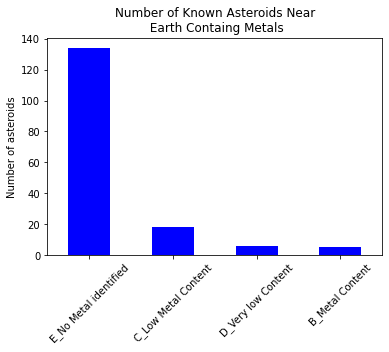

In [54]:
#####################################################
##    Bar chart depicting Total number of asteroids based on quantity of rare eear tvalue
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
close_orbit_Plot_df.plot(kind = "bar", y="Metal Content", title = "Number of Known Asteroids Near\n Earth Containg Metals", legend = False, facecolor = "blue",rot=45)

plt.ylabel("Number of asteroids")

plt.savefig("Rare_earth_metals/01b_Near_earth_Asteroids_containg_metals_bar.png")


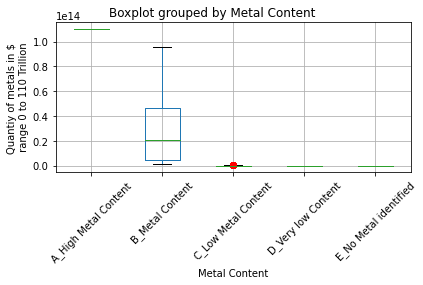

<Figure size 432x288 with 0 Axes>

In [55]:
#############    Goal
# Generate a box plot of the quantity of asteroidsin dollars in five categories of interest

#Tumor volume at last observation.

asteroid_value_df.boxplot(by="Metal Content", column= ["total value($)"], labels=None, sym="r", fontsize = 10, rot=45) 

plt.ylabel("Quantiy of metals in $\n range 0 to 110 Trillion")
plt.title("")
plt.tight_layout()
plt.show()

plt.savefig("Rare_earth_metals/02a_Kno_boxplot.png")

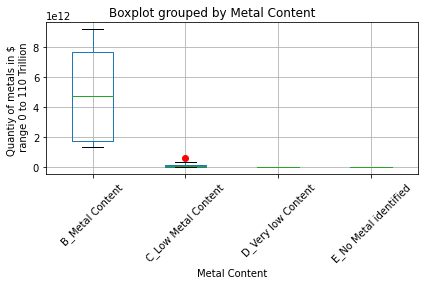

<Figure size 432x288 with 0 Axes>

In [56]:
#############    Goal
# Generate a box plot of the quantity of asteroidsin dollars in four categories of interest

#Tumor volume at last observation.

Close_df.boxplot(by="Metal Content", column= ["total value($)"], labels=None, sym="r",rot=45 ) 
""

plt.ylabel("Quantiy of metals in $ \n range 0 to 110 Trillion")
plt.title("")
plt.tight_layout()
plt.show()

plt.savefig("Rare_earth_metals/02b_metals_boxplot.png")

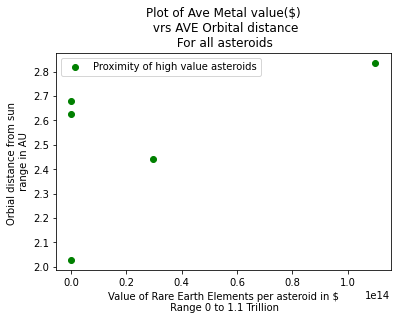

<Figure size 432x288 with 0 Axes>

In [57]:
#################################################################
#################### Goal
# Generate a scatter plot of  all known asteroids with ave Metals($) vrs ave orbital distance

#    y values: Value of Rare earth elements
scater_plot_y= all_asteroid_stats_df["Orbit (AU) AVE"]



#    x values: Asteroid value indicating met
scater_plot_x = all_asteroid_stats_df["total value($) AVE"]


# Setting up the scatter plot
plt.scatter(scater_plot_x, scater_plot_y, label="Proximity of high value asteroids", color= 'green')

# Plot formating
plt.xlabel("Value of Rare Earth Elements per asteroid in $\n Range 0 to 1.1 Trillion")
plt.ylabel("Orbial distance from sun \n range in AU ")

plt.title("Plot of Ave Metal value($)\n vrs AVE Orbital distance\n For all asteroids")
plt.legend()
plt.show()
plt.tight_layout()

plt.savefig("Rare_earth_metals/03__known_AVE_scater.png")

y = 83052677639951.77x +-181582721620797.0
The r-value is: 0.2945


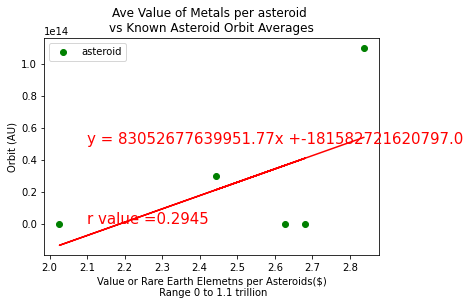

<Figure size 432x288 with 0 Axes>

In [58]:
######################################
######      Goal

##############   Plots avera angle vrs average cost by content of metal on all knonw asteroid
# Calculate the correlation coefficient and linear regression model 
# Generate a scatter plot of Asteroids containg metals versus orbit patern of all asteroids

# set x and y
# Taken from scater plot above for x and y
x_values = all_asteroid_stats_df["Orbit (AU) AVE"]
y_values = all_asteroid_stats_df["total value($) AVE"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

rvalue2 = round(rvalue**2,4)
rvalue_plot = "r value =" + str(rvalue2)
plt.annotate(rvalue_plot,(2.1,10000000), fontsize=15,color="red")

# Create Plot
plt.scatter(x_values,y_values, label="asteroid", color= 'green')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Value or Rare Earth Elemetns per Asteroids($)\n Range 0 to 1.1 trillion")
plt.ylabel("Orbit (AU)")
plt.annotate(line_eq,(2.1,50000000000000),fontsize=15,color="red")
#plt.legend()
plt.legend()
plt.title(f"Ave Value of Metals per asteroid \nvs Known Asteroid Orbit Averages")


# Print r value
print(f"The r-value is: {rvalue2}")

# can not get this to work
#plt.annotate(line_eq,(1,1),fontsize=15,color="red")

# Show plot
plt.show()
plt.savefig("Rare_earth_metals/03reg_scater.png")

y = -28819186108802.62x +30240860868078.36
The r-value is: 0.9545


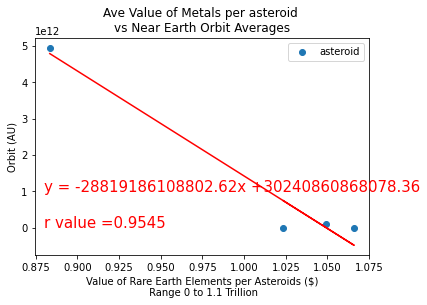

<Figure size 432x288 with 0 Axes>

In [59]:
######################################
######      Goal

##############   Plots avera angle vrs average cost by content of metal on all knonw asteroid
# Calculate the correlation coefficient and linear regression model 
# Generate a scatter plot of Asteroids containg metals versus orbit patern of near earth Asteroids

# set x and y
# Taken from scater plot above for x and y
x_values = all_close_asteroid_stats["Orbit (AU) AVE"]
y_values = all_close_asteroid_stats["total value($) AVE"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

rvalue2 = round(rvalue**2,4)
rvalue_plot = "r value =" + str(rvalue2)
plt.annotate(rvalue_plot,(.88,5), fontsize=15,color="red")

# Create Plot
plt.scatter(x_values,y_values, label="asteroid")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Value of Rare Earth Elements per Asteroids ($)\n Range 0 to 1.1 Trillion")
plt.ylabel("Orbit (AU)")
plt.annotate(line_eq,(.88, 1000000000000),fontsize=15,color="red")
#plt.legend()
plt.legend()
plt.title(f"Ave Value of Metals per asteroid \nvs Near Earth Orbit Averages")


# Print r value
print(f"The r-value is: {rvalue2}")

# can not get this to work
#plt.annotate(line_eq,(1,1),fontsize=15,color="red")

# Show plot
plt.show()
plt.savefig("Rare_earth_metals/03a__nearEarth_AsteroidsAVE_scater.png")

y = 0.0x +2.62
The r-value is: 0.0001


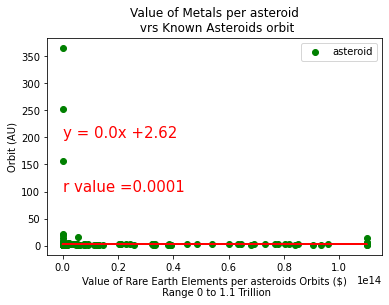

<Figure size 432x288 with 0 Axes>

In [60]:
######################################
######      Goal
# Calculate the correlation coefficient and linear regression model 
# Generate a scatter plot of Asteroids containg metals versus orbit patern of all asteroids

# set x and y
# Taken from scater plot above for x and y
x_values = asteroid_value_df["total value($)"]
y_values = asteroid_value_df["Orbit (AU)"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

rvalue2 = round(rvalue**2,4)
rvalue_plot = "r value =" + str(rvalue2)
plt.annotate(rvalue_plot,(150,100), fontsize=15,color="red")

# Create Plot
plt.scatter(x_values,y_values, label="asteroid", color= 'green')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Value of Rare Earth Elements per asteroids Orbits ($)\n Range 0 to 1.1 Trillion")
plt.ylabel("Orbit (AU)")
plt.annotate(line_eq,(1,200),fontsize=15,color="red")
#plt.legend()
plt.legend()
plt.title(f"Value of Metals per asteroid\n vrs Known Asteroids orbit")


# Print r value
print(f"The r-value is: {rvalue2}")

# can not get this to work
#plt.annotate(line_eq,(80,80),fontsize=15,color="red")

# Show plot
plt.show()
plt.savefig("Rare_earth_metals/04a__known_scaterplot.png")

y = 0.0x +2.62
The r-value is: 0.0562


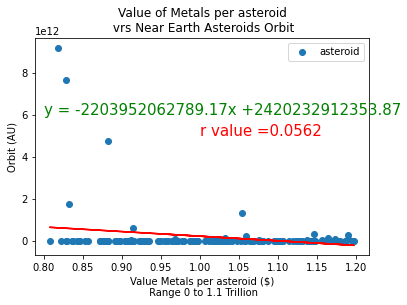

<Figure size 432x288 with 0 Axes>

In [61]:
######################################
######      Goal
# Calculate the correlation coefficient and linear regression model 
# Generate a scatter plot of Asteroids containg metals versus orbit patern intersecting earth

# set x and y
# Taken from scater plot above for x and y
x_values = Close_df["Orbit (AU)"]
y_values = Close_df["total value($)"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
e_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.annotate(e_line_eq,(0.8,6000000000000),fontsize=15,color="green")

rvalue2 = round(rvalue**2,4)
rvalue_plot = "r value =" + str(rvalue2)


# Create Plot
plt.scatter(x_values,y_values, label="asteroid")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Value Metals per asteroid ($)\n Range 0 to 1.1 Trillion")
plt.ylabel("Orbit (AU)")

#plt.legend()
plt.legend()
plt.title(f"Value of Metals per asteroid\n vrs Near Earth Asteroids Orbit")


plt.annotate(rvalue_plot,(1,5000000000000), fontsize=15,color="red")


# Print r value
print(f"The r-value is: {rvalue2}")



# Show plot
plt.show()
plt.savefig("Rare_earth_metals/04bEarth_scatter.png")